![](https://storage.googleapis.com/kaggle-competitions/kaggle/25225/logos/header.png?t=2021-01-27-17-34-26)

# Tabular Playground Series - May 2021
---
This notebook contains data analysis, data visualization and model development/training. To achieve this I will be importing scikit learn, plotly,, matplotlib, and numpy. I have used following techniques:

    1. Dimensionality reduction technique 
    2. Normalization
    3. Ensembling Models with sklearn.ensemble.VotingClassifier
    4. Classification models:
        
        - Logisitc Regression 
        - Decision Tree
        - Random Forest
        - k-NN
        - XGboost Classifier

# 1. Importing data and libraries 📲
---

Later in this notebook we will see that dataset is imbalanced. This affects the training of model and needs to be addressed. The plan is to first load data as pandas dataframe then normalize it. Then have some visualizations to understand more about the data. Finally preprocessing the scaled into machine learning section.   

## 1.1. Libraries
---

In [1]:
import pandas as pd 
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,5)

import warnings
warnings.filterwarnings('ignore')

## 1.2. Training and Testing data imports
---

In [2]:
train = pd.read_csv("../input/tabular-playground-series-may-2021/train.csv")
test  = pd.read_csv("../input/tabular-playground-series-may-2021/test.csv")
display(train.head())
display(test.head())

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [3]:
print("Train Shape: ", train.shape, "\nTest Shape: ",test.shape)

Train Shape:  (100000, 52) 
Test Shape:  (50000, 51)


In [4]:
#train.dtypes

# 2. Pairwise relationships between continuous variables 🤝 
---

In [5]:
#corr = train.corr()
#corr.style.background_gradient()

We should avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:

    - To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).
    - When our datasets are very large, using fewer features can drastically speed up our computation time.
    
But we find no such strong relations here.

# 3. Normalizing the features 🦾
---

In [6]:
features = train.drop(["id", "target"], axis = 1)
labels = train["target"]
print(features.shape, labels.shape)

(100000, 50) (100000,)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#scaler = StandardScaler()
scaler = PowerTransformer()
scaled_train = scaler.fit_transform(features)

In [8]:
scaled_train.shape, type(scaled_train)

((100000, 50), numpy.ndarray)

In [9]:
scaled_train

array([[-0.36095407, -0.35130683,  3.79019053, ..., -0.41564362,
        -0.68249791, -0.49167856],
       [-0.36095407, -0.35130683, -0.26383751, ..., -0.41564362,
        -0.68249791, -0.49167856],
       [-0.36095407, -0.35130683, -0.26383751, ...,  2.43026571,
         1.52636639, -0.49167856],
       ...,
       [-0.36095407, -0.35130683, -0.26383751, ..., -0.41564362,
         1.52636639, -0.49167856],
       [-0.36095407, -0.35130683, -0.26383751, ..., -0.41564362,
         1.71381376, -0.49167856],
       [-0.36095407, -0.35130683, -0.26383751, ..., -0.41564362,
        -0.68249791,  2.11356523]])

# 4. Dimenstionality Reduction ⏬
---

In [10]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(scaled_train)
exp_var = pca.explained_variance_ratio_
print("Explained Variance: ",exp_var)
print("Components: ",pca.n_components_)

Explained Variance:  [0.02613253 0.02241237 0.02166372 0.0212666  0.02093062 0.02066408
 0.02052806 0.02045398 0.02040138 0.02037468 0.02029107 0.02027311
 0.02026582 0.02020479 0.02014235 0.02011373 0.02007436 0.02003609
 0.01999691 0.01998595 0.01993461 0.01990316 0.01987614 0.01982206
 0.01980031 0.01979751 0.0197809  0.01976327 0.01967747 0.01964803
 0.01963339 0.01959306 0.01957227 0.01952754 0.0194928  0.0194489
 0.01941641 0.01937729 0.01933202 0.01931426 0.01930637 0.01924458
 0.01921568 0.01915032 0.01913102 0.01911231 0.01904419 0.01901017
 0.01896773 0.01889403]
Components:  50


Text(0.5, 0, 'Principal Component #')

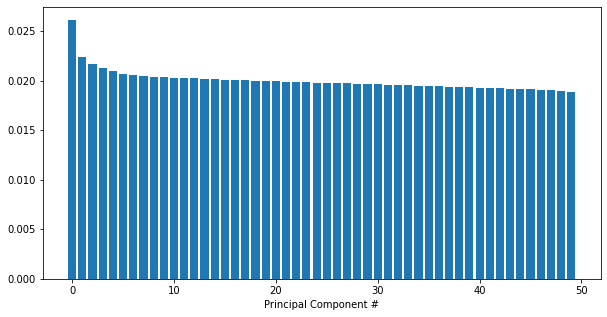

In [11]:
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_var)
ax.set_xlabel('Principal Component #')

In [12]:
n_components = 3
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train)
pca_projection = pca.transform(scaled_train)
pca_projection.shape

(100000, 3)

In [13]:
pca_df = pd.DataFrame(pca_projection, columns = ["PC1","PC2","PC3"])
pca_df.head()

,PC1,PC2,PC3
0,0.615251,-2.632123,-1.003052
1,1.354305,-1.635452,-1.131316
2,-2.506674,0.671427,1.703367
3,0.311724,0.706974,-0.688557
4,1.746801,0.075354,-0.587984


In [14]:
SAMPLE = 1000 #Reduce the total number of points to plot 

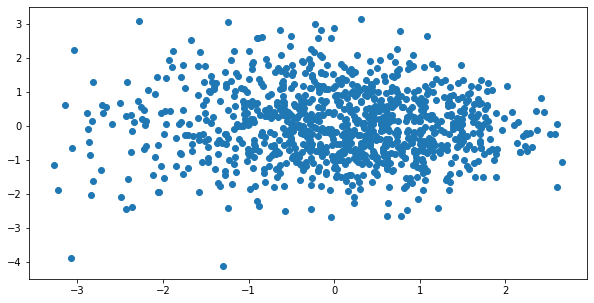

In [15]:
plt.scatter(pca_df.PC1[:SAMPLE], pca_df.PC2[:SAMPLE])

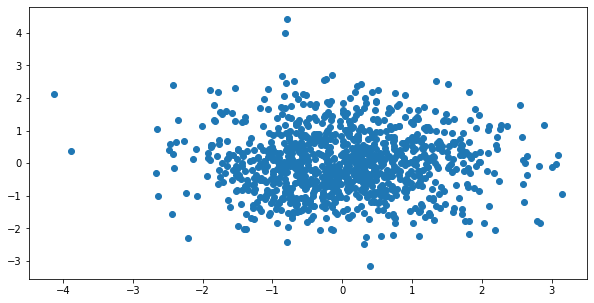

In [16]:
plt.scatter(pca_df.PC2[:SAMPLE], pca_df.PC3[:SAMPLE])

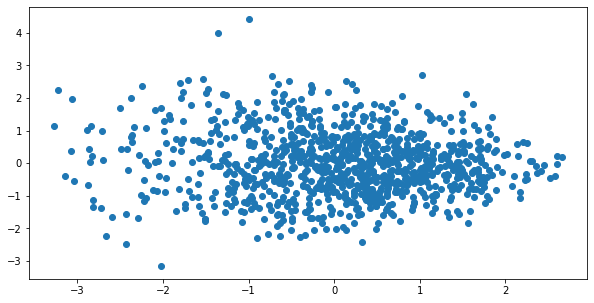

In [17]:
plt.scatter(pca_df.PC1[:SAMPLE], pca_df.PC3[:SAMPLE])

In [18]:
fig = px.scatter_3d(
    pca_projection[:SAMPLE], x=0, y=1, z=2,color =train.target[:SAMPLE],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

# 5. Model Developement and Training 🛠
---

In [19]:
dictionary = {"Class_1":1,"Class_2":2,"Class_3":3,"Class_4":4}
train['target'].replace(dictionary, inplace = True)

In [20]:
train.target.value_counts()

2    57497
3    21420
4    12593
1     8490
Name: target, dtype: int64

On observing the distribution of classes, from above values. The class 2 is in large number than other classes, whereas Class 1 is very low in number. This suggests that our dataset is imnbalanced.

### Importing Libraries and Models
---

In [21]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.model_selection import KFold, cross_val_score

In [22]:
X=scaled_train
y=train['target'].values

train_x, test_x, train_y, test_y = train_test_split( X, y, test_size=0.25, random_state=10)

### 1. Decision Tree
---

In [23]:
tree = DecisionTreeClassifier()
tree.fit(train_x, train_y)
pred_labels_tree = tree.predict(test_x)
print("Decision Tree: \n", classification_report(test_y, pred_labels_tree))

Decision Tree: 
               precision    recall  f1-score   support

           1       0.09      0.10      0.10      2113
           2       0.58      0.56      0.57     14393
           3       0.23      0.24      0.24      5401
           4       0.13      0.14      0.13      3093

    accuracy                           0.40     25000
   macro avg       0.26      0.26      0.26     25000
weighted avg       0.41      0.40      0.40     25000



### 2. Logistic Regression
---

In [24]:
logreg = LogisticRegression(random_state=10)
logreg.fit(train_x, train_y)
pred_labels_logit = logreg.predict(test_x)
class_rep_log = classification_report(test_y, pred_labels_logit)
print("Logistic Regression: \n", class_rep_log)

Logistic Regression: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2113
           2       0.58      0.99      0.73     14393
           3       0.45      0.04      0.08      5401
           4       0.00      0.00      0.00      3093

    accuracy                           0.58     25000
   macro avg       0.26      0.26      0.20     25000
weighted avg       0.43      0.58      0.44     25000



### 3. Random Forest
---

In [25]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10)
rf.fit(train_x, train_y)
pred_labels_rf = rf.predict(test_x)
class_rep_rf = classification_report(test_y, pred_labels_rf)
print("Random Forest: \n", class_rep_rf)

Random Forest: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2113
           2       0.58      1.00      0.73     14393
           3       0.44      0.00      0.00      5401
           4       0.00      0.00      0.00      3093

    accuracy                           0.58     25000
   macro avg       0.26      0.25      0.18     25000
weighted avg       0.43      0.58      0.42     25000



### 4. k Nearest Neighbour
---

In [26]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
pred_labels_knn = knn.predict(test_x)
class_rep_knn = classification_report(test_y, pred_labels_knn)
print("k-Nearest Neighbours: \n", class_rep_knn)

k-Nearest Neighbours: 
               precision    recall  f1-score   support

           1       0.10      0.05      0.06      2113
           2       0.58      0.82      0.68     14393
           3       0.25      0.12      0.16      5401
           4       0.13      0.05      0.07      3093

    accuracy                           0.51     25000
   macro avg       0.27      0.26      0.24     25000
weighted avg       0.41      0.51      0.44     25000



### 5. XGBoost

In [27]:
XGB =xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB.fit(train_x, train_y)
predict_XGB = XGB.predict(test_x)
rep_XGB = classification_report(test_y, predict_XGB)
print(rep_XGB)

[08:11:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2113
           2       0.58      1.00      0.73     14393
           3       0.40      0.01      0.02      5401
           4       0.00      0.00      0.00      3093

    accuracy                           0.58     25000
   macro avg       0.24      0.25      0.19     25000
weighted avg       0.42      0.58      0.42     25000



### 6. Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(train_x, train_y)
predict_ada = ada.predict(test_x)
rep_ada = classification_report(test_y, predict_ada)
print(rep_ada)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2113
           2       0.58      0.98      0.73     14393
           3       0.48      0.06      0.11      5401
           4       0.50      0.00      0.00      3093

    accuracy                           0.58     25000
   macro avg       0.39      0.26      0.21     25000
weighted avg       0.50      0.58      0.44     25000



In [30]:
print(" XGB: ", XGB.score(test_x,test_y),"\n",
     "Logistic Regression: ", logreg.score(test_x,test_y),"\n",
     "Random Forest: ", rf.score(test_x,test_y),"\n",
     "Decision Tree: ", tree.score(test_x,test_y),"\n",
     "k-Nearest Neighbours: ", knn.score(test_x,test_y),"\n",
      "Adaboost: ", ada.score(test_x,test_y)
     )

 XGB:  0.57552 
 Logistic Regression:  0.5776 
 Random Forest:  0.57572 
 Decision Tree:  0.3982 
 k-Nearest Neighbours:  0.50624 
 Adaboost:  0.58008


# 6. Voting Classifier 🗡
---

In [31]:
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [32]:
df_test =  test.drop(['id'],axis=1)

In [33]:
eclf = VotingClassifier(estimators=[('lr', logreg), 
                                    ('rf', rf), 
                                    #('XGB', XGB),
                                    ('ada', ada),
                                    #('Decision Tree', tree), 
                                    #('KNN', knn)
                                   ], 
                        voting='soft')

In [34]:
eclf.fit(X,y)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=10)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=0))],
                 voting='soft')

In [35]:
preds = eclf.predict_proba(df_test)

In [36]:
preds

array([[0.16146425, 0.55455842, 0.16296686, 0.12101047],
       [0.16376083, 0.48263123, 0.2072142 , 0.14639374],
       [0.16258521, 0.49997436, 0.20865423, 0.1287862 ],
       ...,
       [0.1306862 , 0.49360711, 0.23420706, 0.14149963],
       [0.14355793, 0.51915703, 0.18349771, 0.15378733],
       [0.14346034, 0.52219937, 0.18213131, 0.15220897]])

# 7. Submission 📑

In [37]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Class_1'] = preds[:, 0]
submission['Class_2'] = preds[:, 1]
submission['Class_3'] = preds[:, 2]
submission['Class_4'] = preds[:, 3]

submission.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.161464,0.554558,0.162967,0.121010
1,100001,0.163761,0.482631,0.207214,0.146394
2,100002,0.162585,0.499974,0.208654,0.128786
3,100003,0.130225,0.444172,0.277227,0.148375
4,100004,0.151738,0.573397,0.160071,0.114794


In [38]:
submission.to_csv("submission#7.csv", encoding='utf-8', index=False)

# Thank you!

- Author: [Pratik Kumar](https://pr2tik1.github.io)<br>
- What next?
    - Handle Imbalance within dataset
    - More Classifiers
    - Better Training